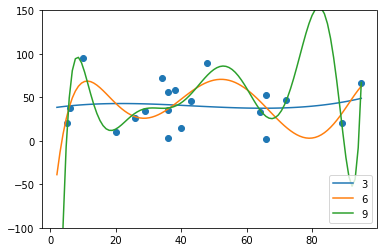

(20,)


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/position_salaries.csv')
#x = dataset.iloc[:, 1:2].values
#y = dataset.iloc[:, 2].values

x = [89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y = [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]

# fitting of N order
mymodel3 = np.poly1d(np.polyfit(x, y, 3))
mymodel6 = np.poly1d(np.polyfit(x, y, 6))
mymodel9 = np.poly1d(np.polyfit(x, y, 9))

myline = np.linspace(2, 95, 100)

plt.scatter(x, y)
plt.ylim(-100,150)
plt.plot(myline, mymodel3(myline),myline,mymodel6(myline),myline,mymodel9(myline))
plt.legend(["3",  "6",  "9"], loc ="lower right")
plt.show()
 
print(np.asarray(x).shape)

In [13]:
from sklearn.metrics import r2_score

mymodel = np.poly1d(np.polyfit(x, y, 3))

print('N= 3, r2 = ' , r2_score(y, mymodel(x)))
mymodel = np.poly1d(np.polyfit(x, y, 6))
print('N= 6, r2 = ' ,r2_score(y, mymodel(x)))
mymodel = np.poly1d(np.polyfit(x, y, 9))
print('N= 9, r2 = ' ,r2_score(y, mymodel(x)))

N= 3, r2 =  0.009952707566680652
N= 6, r2 =  0.2715317027962796
N= 9, r2 =  0.532633666449029


The highest the order , the better the r2

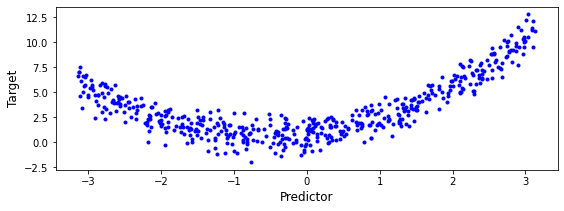

In [14]:
# creating a dataset with curvilinear relationship
M= 512;  

x = np.pi * (2*np.random.rand(M, 1) - 1)
y = np.pi *( x**2 + x + 1)/4 + np.random.randn(M, 1)
 
#visualize the data
plt.figure(figsize=(9,3))
plt.plot(x, y, 'b.')
plt.xlabel('Predictor',fontsize=12)
plt.ylabel('Target',fontsize=12)
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# split data in train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
# Apply simple linear regression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print('(linear fitting) r2 score=  ',r2_score(y_test, y_pred))

(linear fitting) r2 score=   0.14480169811318377


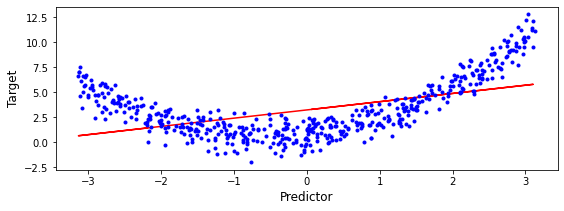

In [16]:
# plotting linear predictions
plt.figure(figsize=(9,3))
plt.plot(x_train, lr.predict(x_train), color="r")
plt.plot(x, y, "b.")
plt.xlabel('Predictor',fontsize=12)
plt.ylabel('Target',fontsize=12)
plt.show()

In [18]:
# Polynomial Regression degree 2
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)
print('(2-order fitting) r2 score=  ',r2_score(y_test, y_pred))
print('theta2,theta1,theta0= ',lr.coef_, lr.intercept_)
 

(2-order fitting) r2 score=   0.8863905623937638
theta2,theta1,theta0=  [[0.         0.80946488 0.78873268]] [0.80344019]


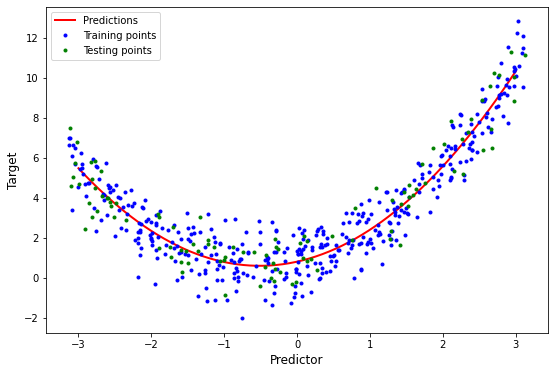

In [19]:
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)
plt.figure(figsize=(9,6))
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel('Predictor',fontsize=12)
plt.ylabel('Target',fontsize=12)
plt.legend()
plt.show()

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(x, y)
    y_newbig = polynomial_regression.predict(X_new)
    #plotting prediction line
    plt.figure(figsize=(9,6))
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(x_train, y_train, "b.", linewidth=3)
    plt.plot(x_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel('Predictor',fontsize=12)
    plt.ylabel('Target',fontsize=12)
    plt.axis([-3, 3, 0, 10])
    plt.show()

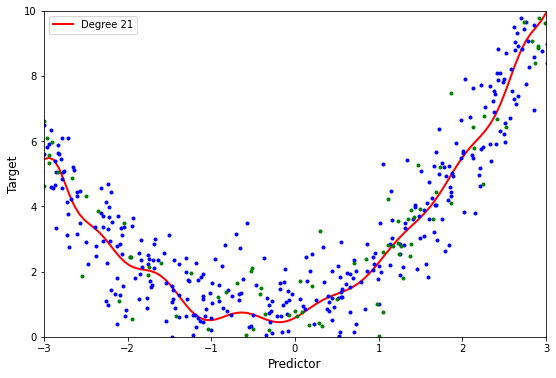

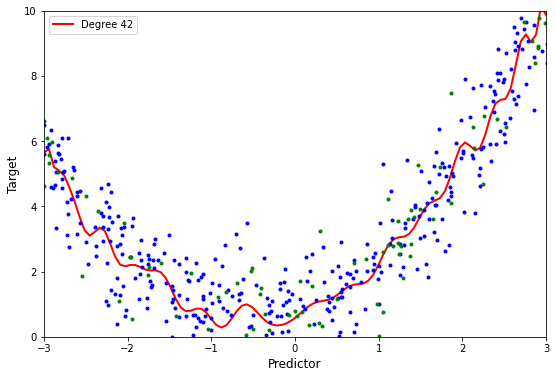

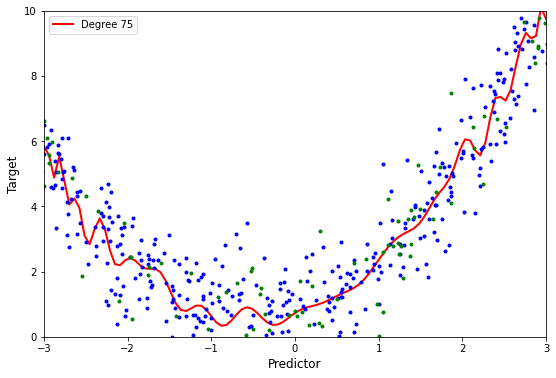

In [118]:
polynomial_regression(21)
polynomial_regression(42)
polynomial_regression(75)

In [ ]:
# calcular r2 test